In [1]:
#@title ** Librerias **
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import scipy.stats as stats
import imageio
import numpy as np
import pandas as pd
import plotly as py
import plotly.express as px
# import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from IPython.display import HTML

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__

# Using plotly + cufflinks in offline mode
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [ ]:
#@title ** Kaggle**
##https://www.kaggle.com/datasets/debasisdotcom/parkinson-disease-detection
##https://www.kaggle.com/datasets/adityakadiwal/water-potability
##https://www.kaggle.com/datasets/samahsadiq/benign-and-malicious-qr-codes

In [2]:
d = pd.read_csv("https://docs.google.com/uc?export=download&id=1Dc-PIWb0YVgw0MKY4MioN9XZ7k5zR7B4")

In [ ]:
d.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
d.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
d.shape

(3276, 10)

In [ ]:
d.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
d.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
data = d.copy()

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


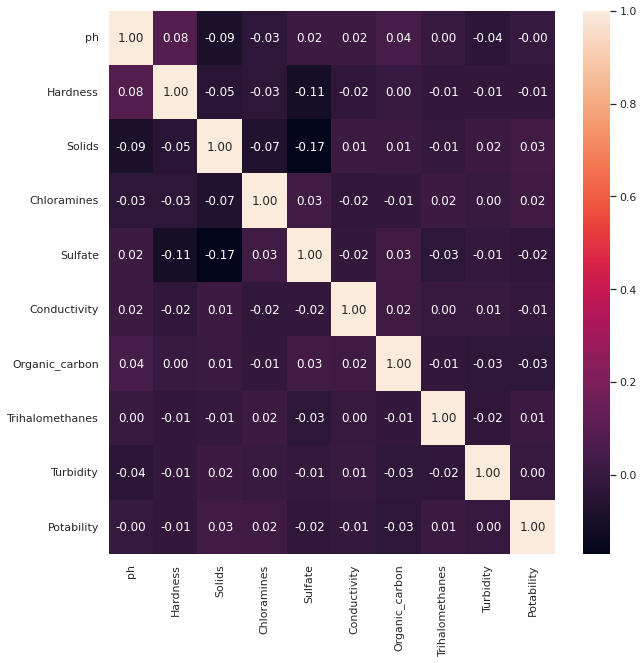

In [ ]:
corr = data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt=".2f")

# Tratamiento de datos

In [ ]:
data_p = d[d.Potability == 1]
data_n = d[d.Potability == 0]

In [ ]:
print( ' Porcentaje de datos de agua potable: ', (d.Potability[d.Potability == 0].shape[0])/(d.shape[0]))
print( ' Porcentaje de datos de agua NO potable: ', (d.Potability[d.Potability == 1].shape[0])/(d.shape[0]))

 Porcentaje de datos de agua potable:  0.6098901098901099
 Porcentaje de datos de agua NO potable:  0.3901098901098901


Porcentaje muestras de agua potable:  0.3901098901098901
Porcentaje muestras de agua no potable:  0.6098901098901099 



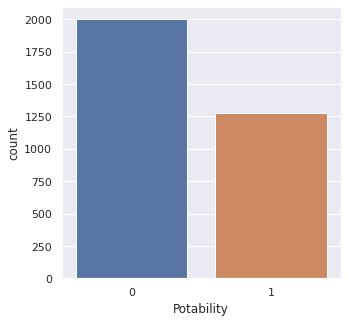

In [ ]:
plt.rcParams['figure.figsize'] = [5,5]
sns.countplot(data = d, x = d.Potability)
print('Porcentaje muestras de agua potable: ', (d.Potability[d.Potability == 1].shape[0])/(d.shape[0]))
print('Porcentaje muestras de agua no potable: ', (d.Potability[d.Potability == 0].shape[0])/(d.shape[0]), '\n')

Kdeplot genera una curva en relacion a la distribucion de probabilidad, similar a un Histograma,

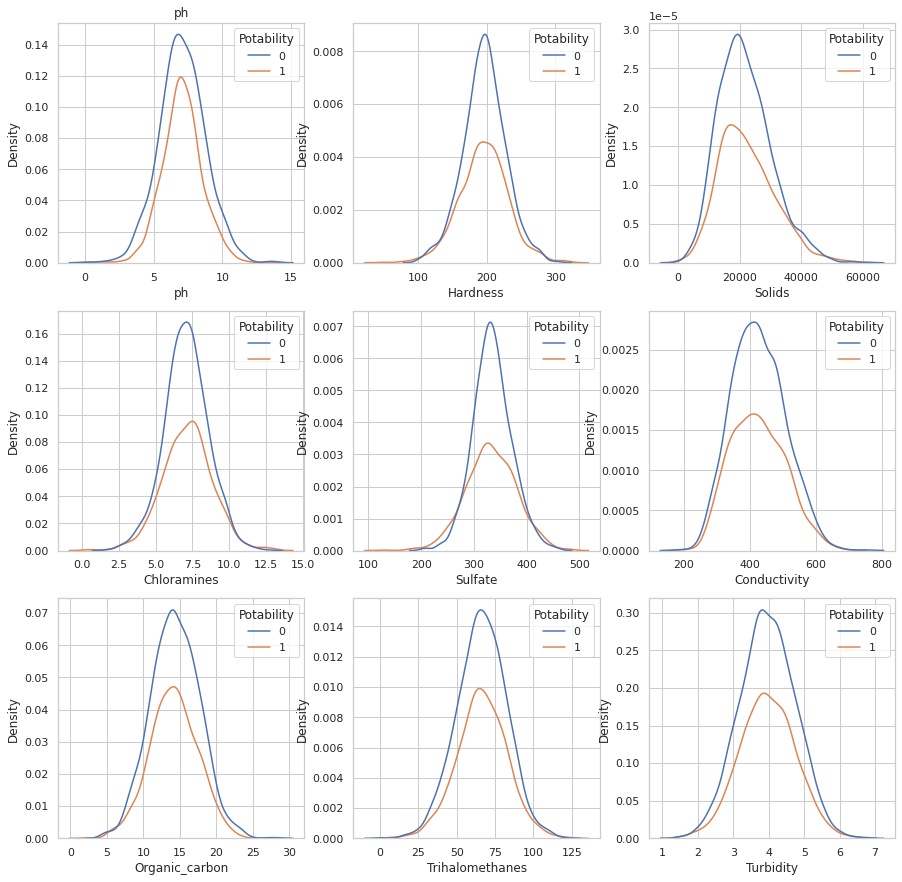

In [ ]:
#@title **Plots de datos con valores Nan distribucion **

sns.color_palette("husl", 9)
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = [15, 15]

plt.subplot(3,3,1)
plt.title('ph')
sns.kdeplot(x=data['ph'],hue = data['Potability'])

plt.subplot(3,3,2)
sns.kdeplot(x=data['Hardness'],hue = data['Potability'])

plt.subplot(3,3,3)
sns.kdeplot(x=data['Solids'],hue = data['Potability'])

plt.subplot(3,3,4)
sns.kdeplot(x=data['Chloramines'],hue = data['Potability'])

plt.subplot(3,3,5)
sns.kdeplot(x=data['Sulfate'],hue = data['Potability'])

plt.subplot(3,3,6)
sns.kdeplot(x=data['Conductivity'],hue = data['Potability'])

plt.subplot(3,3,7)
sns.kdeplot(x=data['Organic_carbon'],hue = data['Potability'])

plt.subplot(3,3,8)
sns.kdeplot(x=data['Trihalomethanes'],hue = data['Potability'])

plt.subplot(3,3,9)
sns.kdeplot(x=data['Turbidity'],hue = data['Potability'])



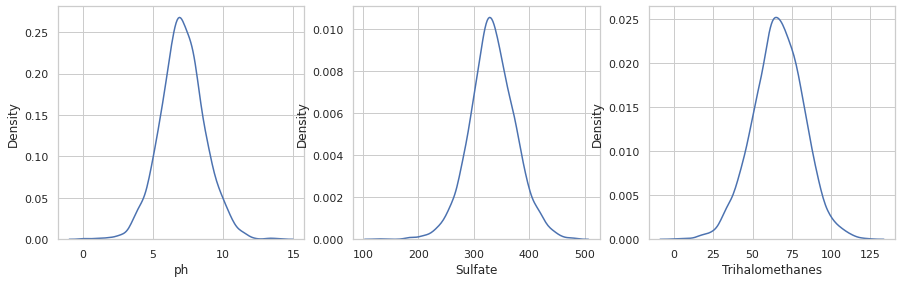

In [ ]:
#@title **Plots de datos con valores Nan**

data = d.copy()

sns.color_palette("husl", 9)
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = [15, 30]

plt.subplot(6,3,1)

sns.kdeplot(x=data['ph'])

plt.subplot(6,3,2)

sns.kdeplot(x=data['Sulfate'])

plt.subplot(6,3,3)

sns.kdeplot(x=data['Trihalomethanes'])


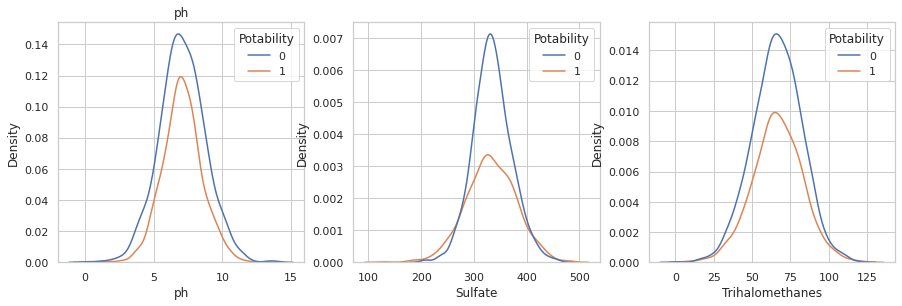

In [ ]:
#@title **Plots de datos con valores Nan separados por potabilidad**
data = d.copy()

sns.color_palette("husl", 9)
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = [15, 15]

plt.subplot(3,3,1)
plt.title('ph')
sns.kdeplot(x=data['ph'],hue = data['Potability'])

plt.subplot(3,3,2)
sns.kdeplot(x=data['Sulfate'],hue = data['Potability'])

plt.subplot(3,3,3)
sns.kdeplot(x=data['Trihalomethanes'],hue = data['Potability'])

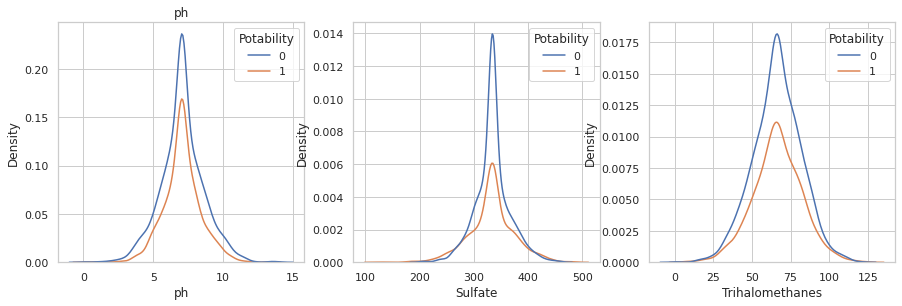

In [ ]:
#@title **Plots de datos sin valores Nan remplazandos por la media**
mean = data_p.ph.mean()
data_p.ph.fillna(mean, inplace=True)
data_n.ph.fillna(mean, inplace=True)

mean = data_n.Sulfate.mean()
data_p.Sulfate.fillna(mean, inplace=True)
data_n.Sulfate.fillna(mean, inplace=True)

mean = data_n.Trihalomethanes.mean()
data_p.Trihalomethanes.fillna(mean, inplace=True)
data_n.Trihalomethanes.fillna(mean, inplace=True)

data_m = pd.concat([data_p,data_n])

sns.color_palette("husl", 9)
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = [15, 15]

plt.subplot(3,3,1)
plt.title('ph')
sns.kdeplot(x=data_m['ph'],hue = data['Potability'])

plt.subplot(3,3,2)
sns.kdeplot(x=data_m['Sulfate'],hue = data['Potability'])

plt.subplot(3,3,3)
sns.kdeplot(x=data_m['Trihalomethanes'],hue = data['Potability'])


In [55]:
#@title **Remplazo de datos Nan en base a una distribucion normal en base a la potabilidad del agua**
data = d.copy()

data_p = d[d.Potability == 1]
data_n = d[d.Potability == 0]

mu = np.mean(data_p.ph)
std = np.std(data_p.ph)
mun = np.mean(data_n.ph)
stdn = np.std(data_n.ph)

data_p.ph.fillna(np.random.normal(loc=mu, scale=std, size=1)[0], inplace=True)
data_n.ph.fillna(np.random.normal(loc=mun, scale=stdn, size=1)[0], inplace=True)

mu = np.mean(data_p.Sulfate)
std = np.std(data_p.Sulfate)
mun = np.mean(data_n.Sulfate)
stdn = np.std(data_n.Sulfate)

data_p.Sulfate.fillna(np.random.normal(loc=mu, scale=std, size=1)[0], inplace=True)
data_n.Sulfate.fillna(np.random.normal(loc=mun, scale=stdn, size=1)[0], inplace=True)

mu = np.mean(data_p.Trihalomethanes)
std = np.std(data_p.Trihalomethanes)
mun = np.mean(data_n.Trihalomethanes)
stdn = np.std(data_n.Trihalomethanes)

data_p.Trihalomethanes.fillna(np.random.normal(loc=mu, scale=std, size=1)[0], inplace=True)
data_n.Trihalomethanes.fillna(np.random.normal(loc=mun, scale=stdn, size=1)[0], inplace=True)

data = pd.concat([data_p, data_n])
data_p_n = data.copy()

In [56]:
#@title **Remplazo de datos Nan en base a una distribucion normal**
data = d.copy()

mu = np.mean(data.ph)
std = np.std(data.ph)

data.ph.fillna(np.random.normal(loc=mu, scale=std, size=1)[0], inplace=True)

mu = np.mean(data.Sulfate)
std = np.std(data.Sulfate)

data.Sulfate.fillna(np.random.normal(loc=mu, scale=std, size=1)[0], inplace=True)

mu = np.mean(data.Trihalomethanes)
std = np.std(data.Trihalomethanes)

data.Trihalomethanes.fillna(np.random.normal(loc=mu, scale=std, size=1)[0], inplace=True)

data_t_n = data.copy()


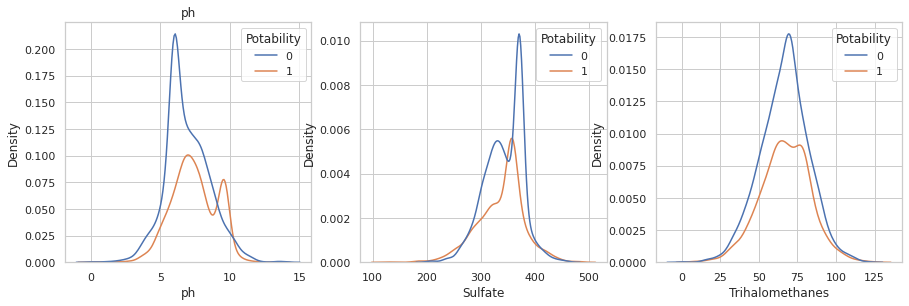

In [57]:
#@title **Plots de datos sin valores Nan remplazados distribuciones normal en base a la potabilidad del agua**
#valores nan remplazados con variable aleatorea en base a una distribucion normal

sns.color_palette("husl", 9)
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = [15, 15]

plt.subplot(3,3,1)
plt.title('ph')
sns.kdeplot(x=data_p_n['ph'],hue = data_p_n['Potability'])

plt.subplot(3,3,2)
sns.kdeplot(x=data_p_n['Sulfate'],hue = data_p_n['Potability'])

plt.subplot(3,3,3)
sns.kdeplot(x=data_p_n['Trihalomethanes'],hue = data_p_n['Potability'])

Ph media antes de agregar datos:  6.825274583392294
S media antes de agregar datos:  332.67388236753897
T media antes de agregar datos:  66.97322450537264
Ph media despues de agregar datos:  6.825274583392294
S media despues de agregar datos:  332.67388236753897
T media despues de agregar datos:  66.97322450537264


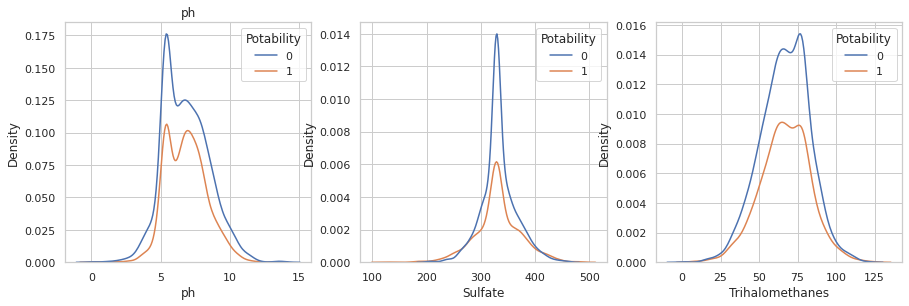

In [58]:
#@title **Plot de los datos Nan en base a una distribucion normal**
#valores nan remplazados con variable aleatorea en base a una distribucion normal

print('Ph media antes de agregar datos: ', np.mean(data.ph))
print('S media antes de agregar datos: ', np.mean(data.Sulfate))
print('T media antes de agregar datos: ', np.mean(data.Trihalomethanes))

data_t_n.head()

sns.color_palette("husl", 9)
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = [15, 15]

plt.subplot(3,3,1)
plt.title('ph')
sns.kdeplot(x=data_t_n['ph'],hue = data_t_n['Potability'])

plt.subplot(3,3,2)
sns.kdeplot(x=data_t_n['Sulfate'],hue = data_t_n['Potability'])

plt.subplot(3,3,3)
sns.kdeplot(x=data_t_n['Trihalomethanes'],hue = data_t_n['Potability'])

print('Ph media despues de agregar datos: ', np.mean(data_t_n.ph.values))
print('S media despues de agregar datos: ', np.mean(data_t_n.Sulfate.values))
print('T media despues de agregar datos: ', np.mean(data_t_n.Trihalomethanes.values))


In [ ]:
data_t_n.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
sns.pairplot(d, hue='Potability')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
sns.pairplot(data, hue='Potability')

Output hidden; open in https://colab.research.google.com to view.

# Prueba clasificadores

In [59]:
#@title **Librerias**
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import os
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import *

2.8.2


In [102]:
X = data_t_n.values[:,:9]
y = data_t_n.values[:,9]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [91]:
def show_curve(est,folds):
    means, stds = [], []
    nfolds_range = range(2,folds)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

Decision Tree Classifier

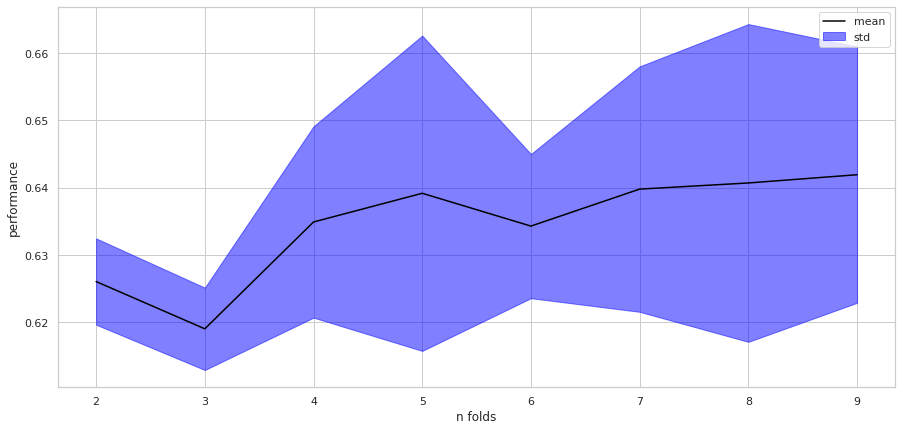

In [93]:
#@title **Grafico de rendimiento en base al numero de folds**
plt.rcParams['figure.figsize'] = [15, 7]
est = DecisionTreeClassifier(max_depth=8, criterion='entropy')
show_curve(est, 10)

In [111]:
est = DecisionTreeClassifier()
s = cross_val_score(est, X, y, cv=KFold(3, shuffle=False), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.553 (+/- 0.01967)


In [64]:
est = DecisionTreeClassifier(max_depth=8,criterion='entropy')
s = cross_val_score(est, X, y, cv=KFold(3, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.631 (+/- 0.01431)


RandomForestClassifier

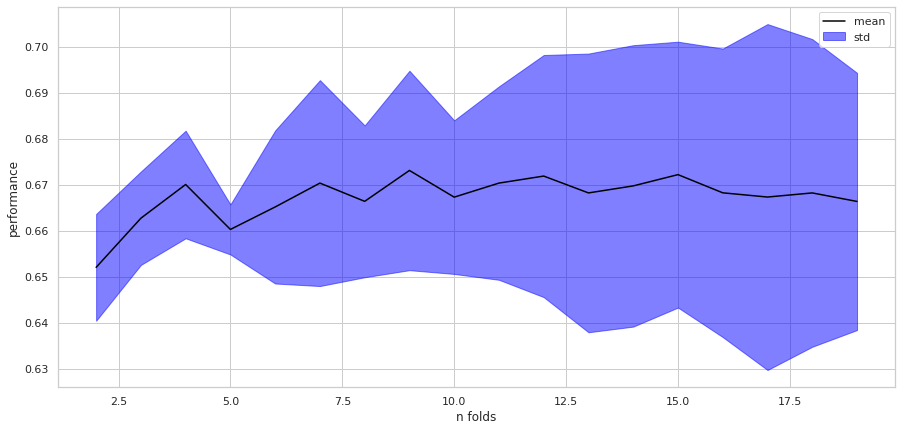

In [65]:
#@title **Grafico de rendimiento en base al numero de folds**
show_curve(RandomForestClassifier(), 20)

In [66]:
est = RandomForestClassifier(n_estimators=200)
s = cross_val_score(est, X, y, cv=KFold(6, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.670 (+/- 0.01833)


SVC

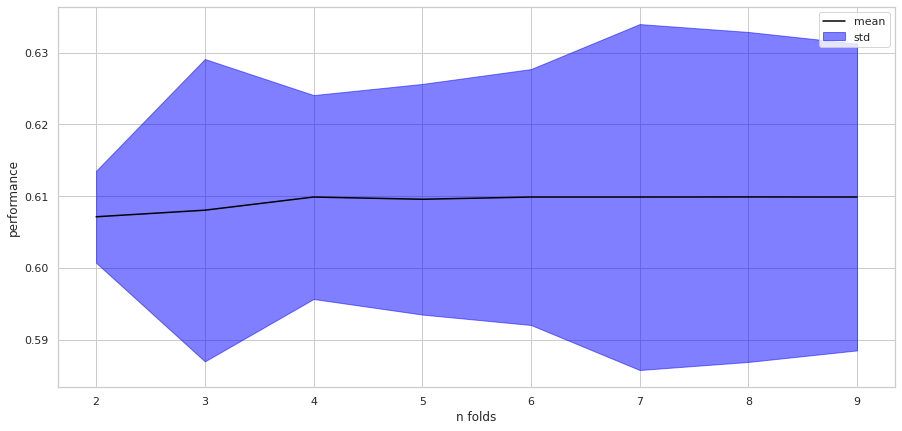

In [67]:
show_curve(SVC(), 10)

In [ ]:
##{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

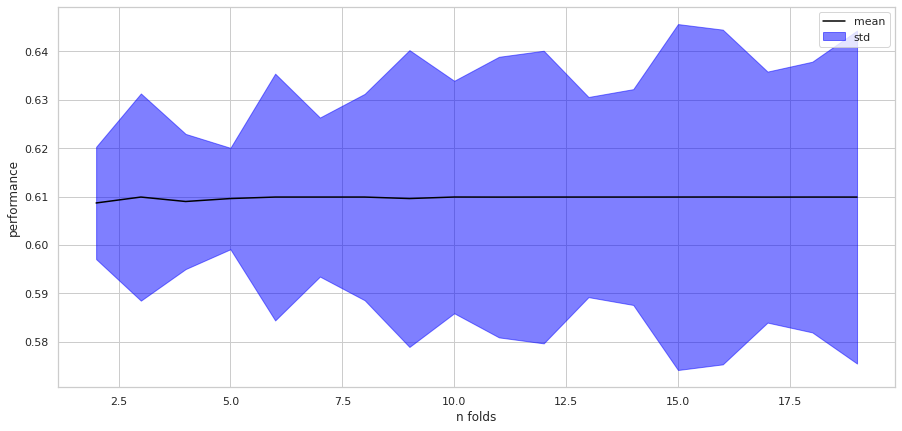

In [70]:
plt.rcParams['figure.figsize'] = [15, 7]
show_curve(SVC(kernel="rbf"), 20)

In [69]:
est = SVC(kernel="rbf")
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.610 (+/- 0.04120)


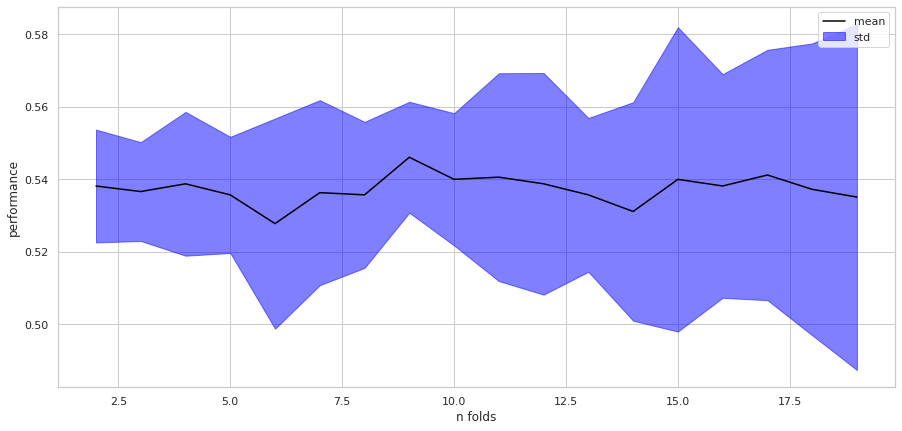

In [71]:
plt.rcParams['figure.figsize'] = [15, 7]
show_curve(SVC(kernel="sigmoid"), 20)

In [ ]:
##tarda mucho en ejecutarse
##est = SVC(kernel='linear')
##s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
##print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

Probando con una red neuronal

PCA 

In [82]:
#@title **code**

X = data_t_n.values[:,:9]
y = data_t_n.values[:,9]
print ("X shape", X.shape)

s = cross_val_score(RandomForestClassifier(), X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))


X = PCA(n_components=6).fit_transform(X)
print( "shape after PCA ", X.shape)

s = cross_val_score(RandomForestClassifier(), X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

X shape (3276, 9)
accuracy 0.670 (+/- 0.03681)
shape after PCA  (3276, 6)
accuracy 0.614 (+/- 0.01734)


Analizando RandomForesClasifier en base a la profundidad o depth

In [73]:
def show_curve(depth):
    means, stds = [], []
    depth_range = range(2,depth)
    for dp in depth_range:
        #print (nfolds,)
        s = cross_val_score(DecisionTreeClassifier(max_depth=dp), X, y, cv=KFold(4, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(depth_range, means, label="mean", color="black")
    plt.fill_between(depth_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n depth")
    plt.ylabel("performance")
    plt.legend()

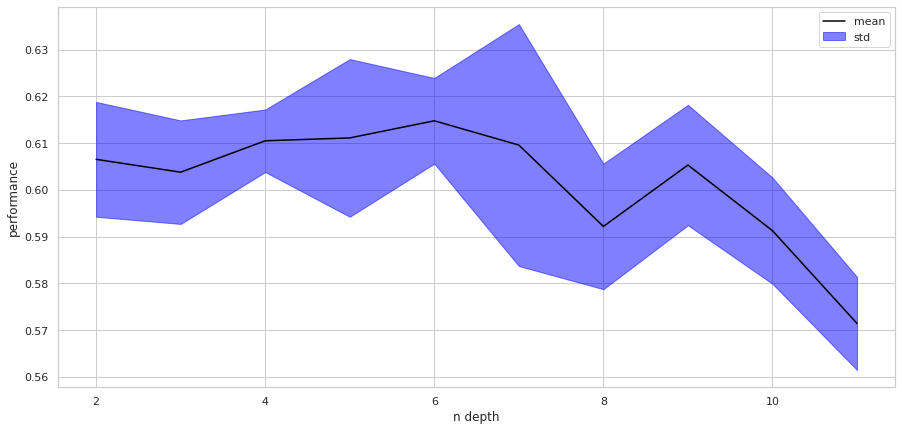

In [74]:
plt.rcParams['figure.figsize'] = [15, 7]
show_curve(12)

In [ ]:
print ("X shape", X.shape)
s = cross_val_score(DecisionTreeClassifier(max_depth=8), X, y, cv=KFold(4, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

X shape (3276, 6)
accuracy 0.587 (+/- 0.00817)


In [ ]:
print ("X shape", X.shape)
s = cross_val_score(DecisionTreeClassifier(max_depth=8, criterion='entropy'), X, y, cv=KFold(4, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

X shape (3276, 6)
accuracy 0.615 (+/- 0.01613)


In [75]:
def show_curve(n_est):
    means, stds = [], []
    n_est_range = range(2,n_est,50)
    for n_e in n_est_range:
        #print (nfolds,)
        s = cross_val_score(RandomForestClassifier( n_estimators=n_e), X, y, cv=KFold(9, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(n_est_range, means, label="mean", color="black")
    plt.fill_between(n_est_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

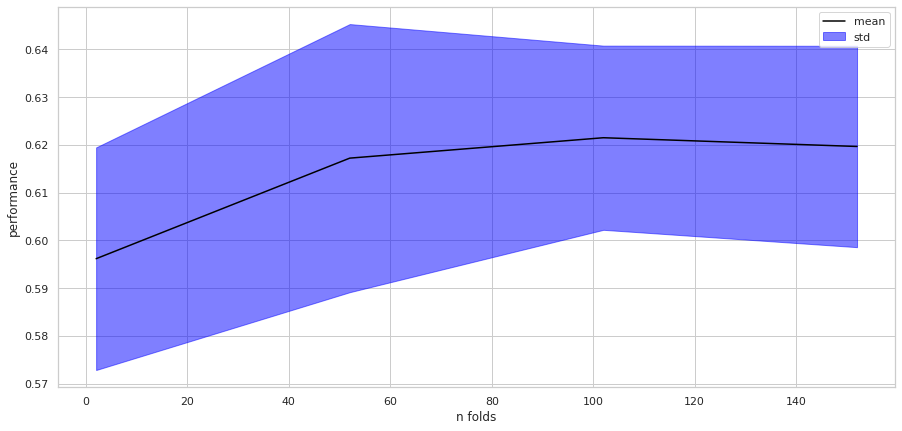

In [76]:
#entropi
show_curve( 200)

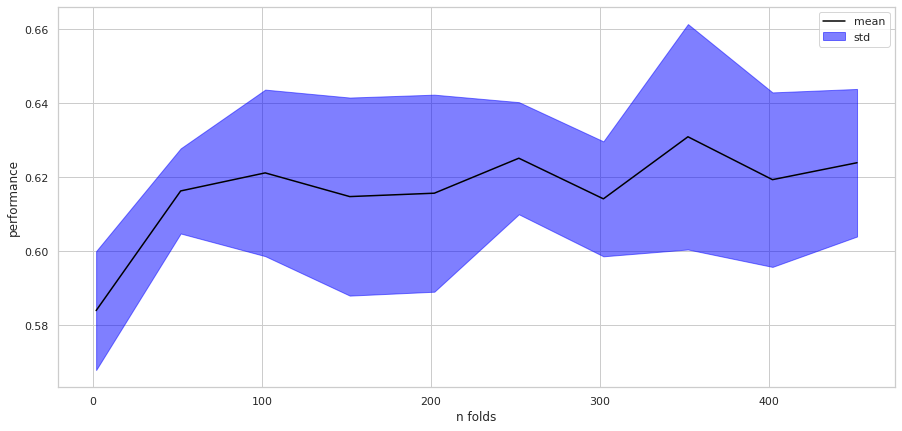

In [77]:
show_curve( 500)

In [78]:
est = RandomForestClassifier(n_estimators=200)
s = cross_val_score(est, X, y, cv=KFold(9, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.626 (+/- 0.01746)


In [79]:
est = RandomForestClassifier(n_estimators=400)
s = cross_val_score(est, X, y, cv=KFold(3, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.631 (+/- 0.00283)


# Prueba con clasificadores 2

In [8]:
#@title **Librerias**
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import os
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import *

2.8.2


In [127]:
X = data_p_n.values[:,:9]
y = data_p_n.values[:,9]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [116]:
def show_curve(est,folds):
    means, stds = [], []
    nfolds_range = range(2,folds)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()
    return 

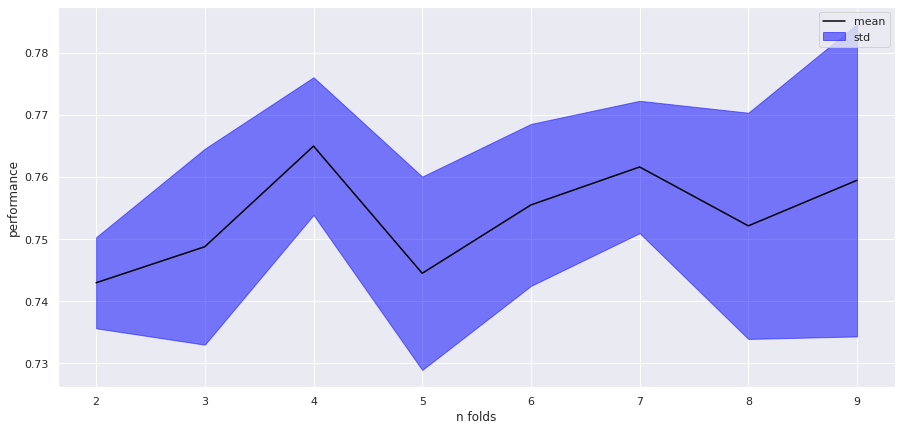

In [11]:
#@title **Grafico de rendimiento en base al numero de folds**
plt.rcParams['figure.figsize'] = [15, 7]
show_curve(DecisionTreeClassifier(max_depth=8, criterion='entropy'), 10)

In [120]:
est = DecisionTreeClassifier()
s = cross_val_score(est, X, y, cv=KFold(4, shuffle=False), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.614 (+/- 0.09225)


In [122]:
est = DecisionTreeClassifier()
s = cross_val_score(est, X, y, cv=KFold(4, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.723 (+/- 0.01293)


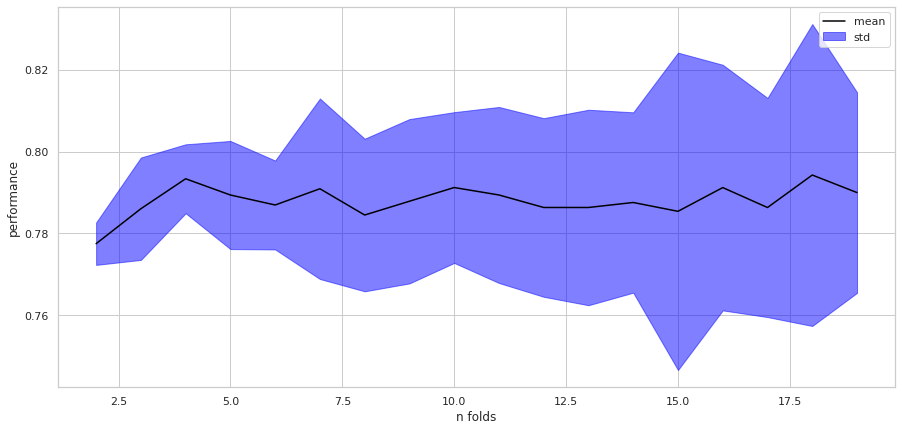

In [130]:
show_curve(RandomForestClassifier(n_estimators=200), 20)

In [15]:
est = RandomForestClassifier(n_estimators=200)
s = cross_val_score(est, X, y, cv=KFold(6, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.795 (+/- 0.01102)


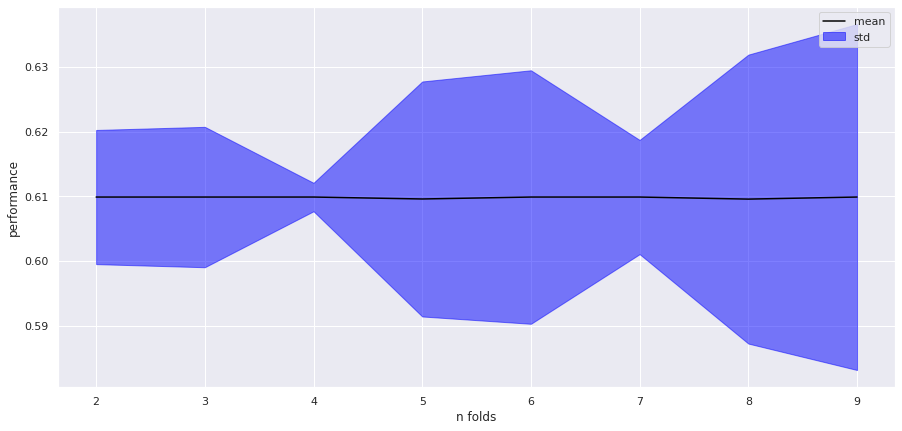

In [16]:
show_curve(SVC(), 10)

In [17]:
##{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

In [123]:
est = SVC()
s = cross_val_score(est, X, y, cv=KFold(6, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.609 (+/- 0.02878)


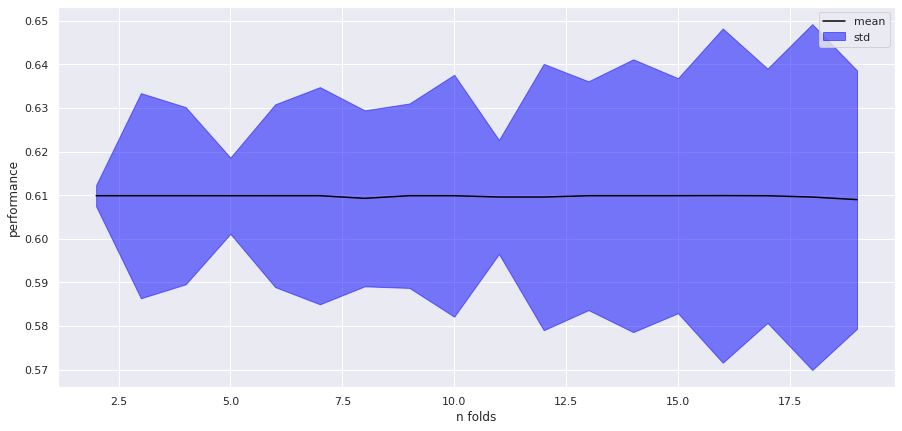

In [19]:
plt.rcParams['figure.figsize'] = [15, 7]
show_curve(SVC(kernel="rbf"), 20)

In [20]:
est = SVC(kernel='sigmoid')
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.539 (+/- 0.02498)


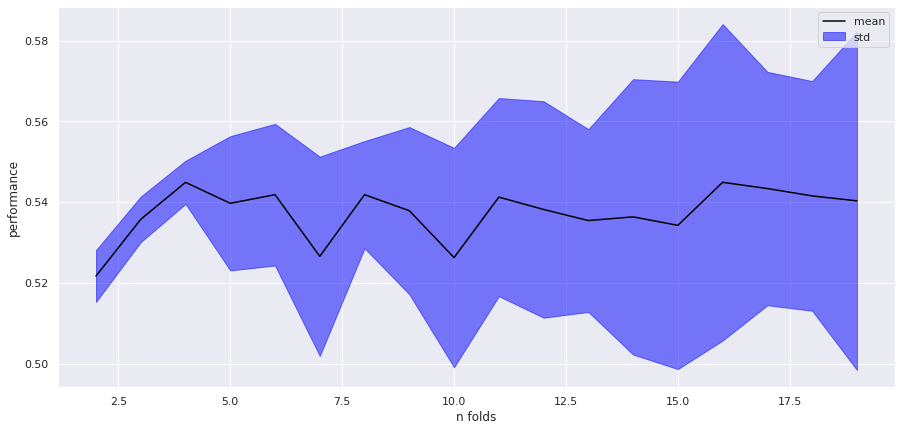

In [21]:
plt.rcParams['figure.figsize'] = [15, 7]
show_curve(SVC(kernel="sigmoid"), 20)

In [10]:
##tarda mucho en ejecutarse
##est = SVC(kernel='linear')
##s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
##print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

In [124]:
#@title **code**

X = data_t_n.values[:,:9]
y = data_t_n.values[:,9]
print ("X shape", X.shape)

s = cross_val_score(RandomForestClassifier(n_estimators=200), X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))


X = PCA(n_components=6).fit_transform(X)
print( "shape after PCA ", X.shape)

s = cross_val_score(RandomForestClassifier(n_estimators=200), X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

X shape (3276, 9)
accuracy 0.675 (+/- 0.02439)
shape after PCA  (3276, 6)
accuracy 0.619 (+/- 0.01967)


In [15]:
def show_curve(depth):
    means, stds = [], []
    depth_range = range(2,depth)
    for dp in depth_range:
        #print (nfolds,)
        s = cross_val_score(DecisionTreeClassifier(max_depth=dp), X, y, cv=KFold(4, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(depth_range, means, label="mean", color="black")
    plt.fill_between(depth_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n depth")
    plt.ylabel("performance")
    plt.legend()

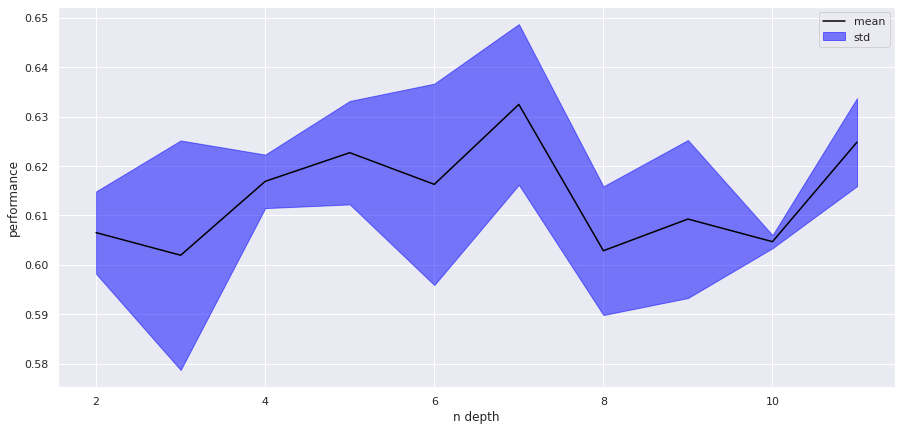

In [16]:
plt.rcParams['figure.figsize'] = [15, 7]
show_curve(12)

In [17]:
print ("X shape", X.shape)
s = cross_val_score(DecisionTreeClassifier(max_depth=8), X, y, cv=KFold(4, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

X shape (3276, 6)
accuracy 0.616 (+/- 0.00698)


In [18]:
print ("X shape", X.shape)
s = cross_val_score(DecisionTreeClassifier(max_depth=8, criterion='entropy'), X, y, cv=KFold(4, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

X shape (3276, 6)
accuracy 0.625 (+/- 0.02052)


In [19]:
def show_curve(n_est):
    means, stds = [], []
    n_est_range = range(2,n_est,50)
    for n_e in n_est_range:
        #print (nfolds,)
        s = cross_val_score(RandomForestClassifier( n_estimators=n_e), X, y, cv=KFold(9, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(n_est_range, means, label="mean", color="black")
    plt.fill_between(n_est_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

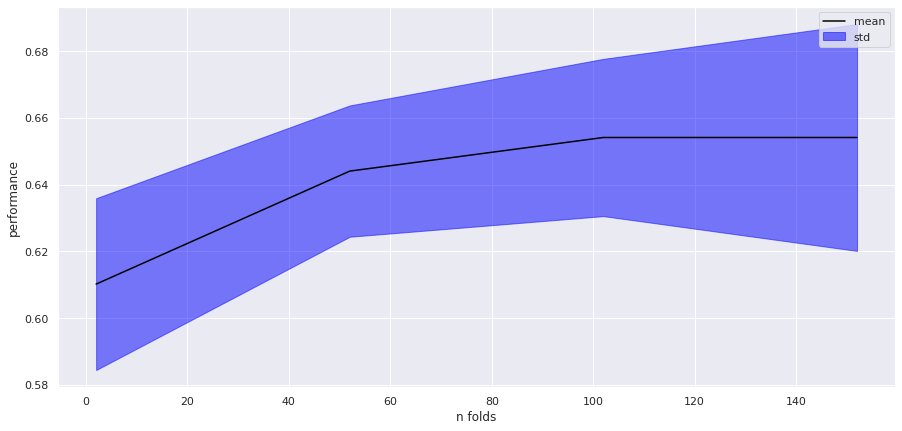

In [20]:
#entropi
show_curve( 200)

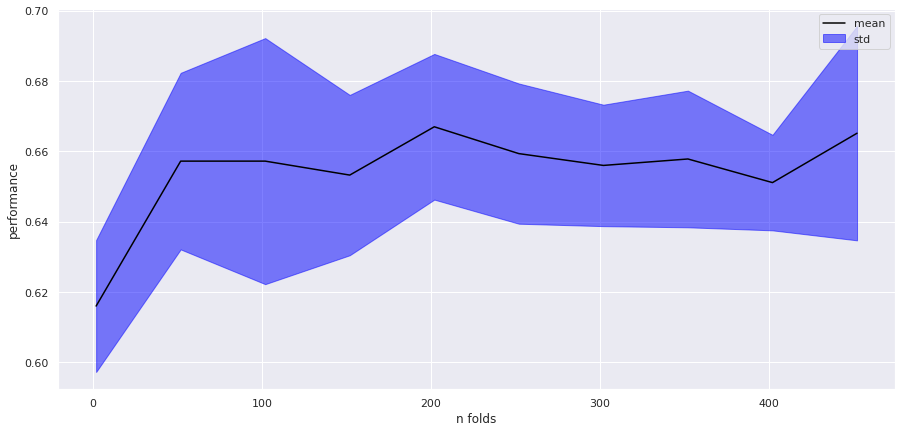

In [21]:
show_curve( 500)

In [22]:
est = RandomForestClassifier(n_estimators=200)
s = cross_val_score(est, X, y, cv=KFold(9, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.659 (+/- 0.02777)


In [23]:
est = RandomForestClassifier(n_estimators=400)
s = cross_val_score(est, X, y, cv=KFold(3, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.646 (+/- 0.01640)
